# Dataset 2D creating

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio

X = np.random.rand(100,2)
print(X)
X.shape[0]

[[0.03907007 0.47311274]
 [0.86189318 0.20655829]
 [0.49507045 0.13027216]
 [0.60053638 0.40617156]
 [0.95395265 0.99988953]
 [0.468812   0.16763365]
 [0.03023311 0.59986585]
 [0.23681325 0.14421069]
 [0.72455573 0.03173282]
 [0.77785485 0.58770057]
 [0.27677979 0.12153995]
 [0.64112784 0.59873788]
 [0.65946829 0.55664021]
 [0.69723393 0.39036094]
 [0.69641505 0.31778776]
 [0.21170374 0.01881044]
 [0.93059977 0.56829242]
 [0.10002699 0.28274388]
 [0.50719387 0.27565738]
 [0.8116357  0.04872353]
 [0.03473038 0.63312957]
 [0.79782381 0.91500255]
 [0.82625328 0.30639446]
 [0.64304022 0.57259407]
 [0.39494653 0.1077818 ]
 [0.26460439 0.23689678]
 [0.97176085 0.22667626]
 [0.68938489 0.93653036]
 [0.88140642 0.33866756]
 [0.81321436 0.39570068]
 [0.62781491 0.11474026]
 [0.98236802 0.26249598]
 [0.15549942 0.96324755]
 [0.92936589 0.5929534 ]
 [0.25351233 0.44379923]
 [0.86712528 0.08392464]
 [0.42149214 0.26951953]
 [0.1099309  0.70346315]
 [0.78746089 0.97836514]
 [0.60873062 0.37500494]


100

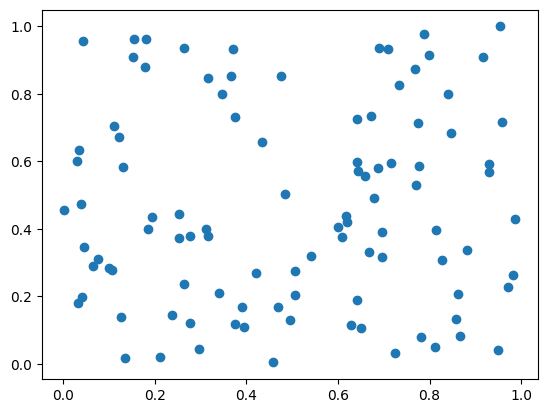

In [2]:
plt.scatter(X[:,0],X[:,1])

# k-means implementation

In [3]:
def partitions_equal(p1, p2):
    if p1.keys() != p2.keys():
        return False
    for k in p1:
        if len(p1[k]) != len(p2[k]):
            return False
        for a, b in zip(p1[k], p2[k]):
            if not np.array_equal(a, b):
                return False
    return True

import numpy as np

def kmeans(X, k, max_iters=100):
    
    X = np.array(X)  # pretvori listu tenzora/vektora u NumPy array
    n_samples = len(X)
    
    X_flat = X.reshape(n_samples, -1) #flattenam podatke da mogu ovaj kmeans koristit za bilo koji tip podataka

    # Inicijalizacija klastera: random stavljam tocke u neke klastere prvo
    cluster_ids = np.random.randint(0, k, size=n_samples)
    
    centroids = np.zeros((k, X_flat.shape[1]))

    for i in range(k):
        points_in_cluster = X_flat[cluster_ids == i]
        if len(points_in_cluster) > 0:
            centroids[i] = points_in_cluster.mean(axis=0)
        else:
            centroids[i] = X_flat[np.random.randint(0, n_samples)]

    for iteration in range(max_iters):

        distances = np.linalg.norm(
            X_flat[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2
        )
        new_cluster_ids = np.argmin(distances, axis=1)

        if np.array_equal(cluster_ids, new_cluster_ids):
            break

        cluster_ids = new_cluster_ids
        
        for i in range(k):
            members = X_flat[cluster_ids == i]
            if len(members) > 0:
                centroids[i] = members.mean(axis=0)
            else:
                centroids[i] = X_flat[np.random.randint(0, n_samples)]

    
    
    return centroids, cluster_ids


# checking k-means for 2D dataset

In [4]:
colors = ['red', 'green', 'blue']  
centroids, partition = kmeans(X, k=3)
centroids 


array([[0.43858287, 0.20297207],
       [0.20002434, 0.70947573],
       [0.78538383, 0.62524314]])

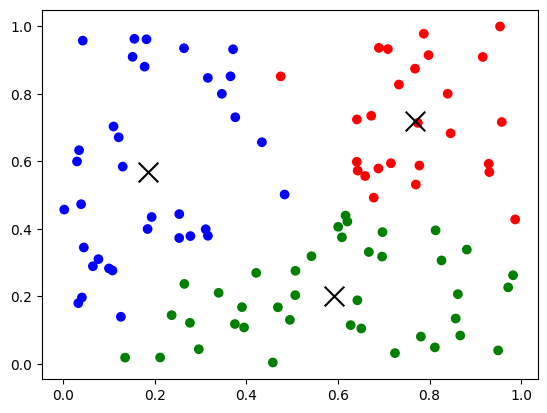

In [5]:
centroids, cluster_ids = kmeans(X, k=3)
plt.scatter(X[:,0],X[:,1], c=[colors[i] for i in cluster_ids])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='black')   

# MNIST dataset
Vec je spremljen u pytorchu jej: https://discuss.pytorch.org/t/loading-mnist-from-pytorch/137456

In [6]:
from torchvision import datasets, transforms
KWARGS = {'root': './data', 'train': True, 'download': True, 'transform': transforms.ToTensor()}
trainset = datasets.MNIST(**KWARGS)

In [7]:
shape = trainset.data.shape
print(shape)
trainset.data[0]
len(trainset.data)

torch.Size([60000, 28, 28])


60000

In [8]:
import numpy
import torch
print(numpy.__version__)
print(torch.__version__)

1.26.4
2.2.2


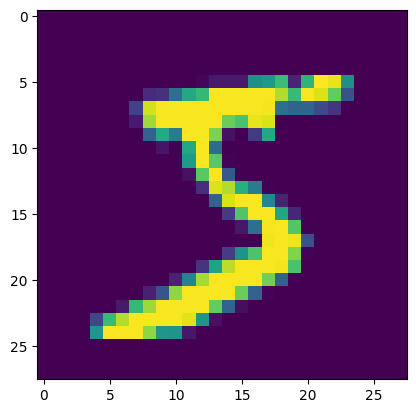

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(trainset.data[0])

# k - means on MNIST

In [10]:

# k - means on MNIST
centroids, partition = kmeans(trainset.data , k=10, max_iters=20 )


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import umap

X_full = trainset.data.numpy()  # ako je PyTorch tensor, pretvori u NumPy
n_samples = len(X_full)

X_flat = X_full.reshape(n_samples, -1)

centroids, partition = kmeans(X_flat, k=10, max_iters=20)



/Users/perica/Documents/GitHub/Matrix-and-Tensor-Methods-in-Data-Analysis/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


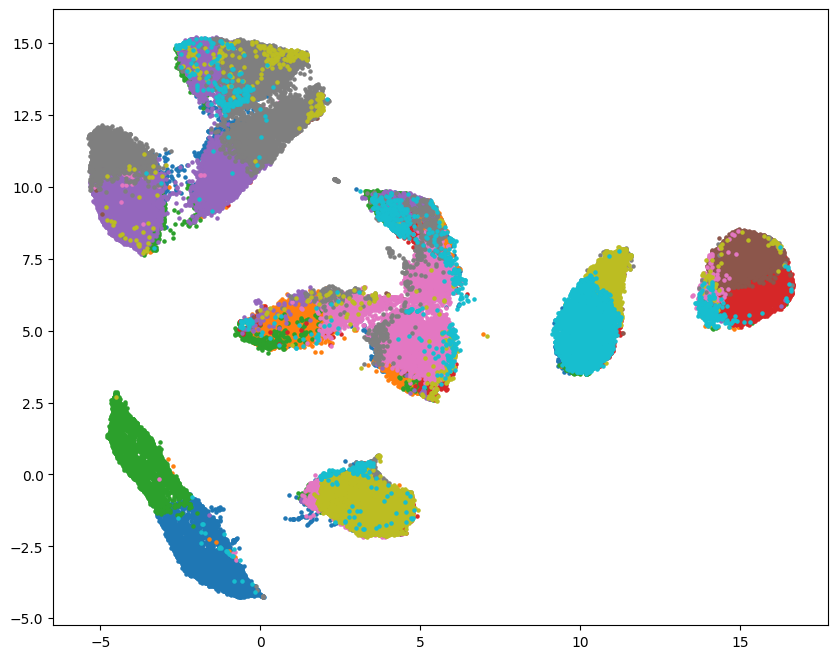

In [16]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2)
X_2d = umap_model.fit_transform(X_flat)

# Scatter plot svih točaka, boje po klasteru
plt.figure(figsize=(10,8))
for cluster_id in range(10):
    points = X_2d[partition == cluster_id]
    plt.scatter(points[:,0], points[:,1], label=f'Cluster {cluster_id}', s=5)  # smanjen size zbog velikog broja točaka
